1.피드 포워드 신경망(Feed-Forward Neural Network, FFNN)

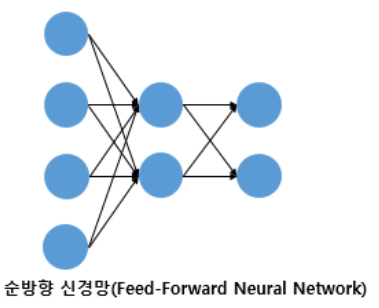

위 그림의 MLP::(Multi Layer Perceptron)와 같이 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망을 피드 포워드 신경망(Feed-Forward Neural Network, FFNN)이라 함


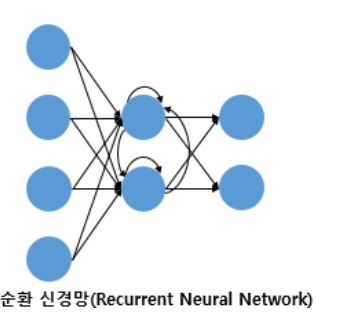

In [ ]:
# 위의 그림은 FFNN에 속하지 않는 RNN이라는 신경망을 나타낸다. 위의 신경망은 은닉층의 출력값을 출력층으로도 값을 보내지만,
# 그와 동시에 은닉층의 출력값이 다시 은닉층의 입력으로도 활용된다.

2. 활성화 함수(Activation Function)

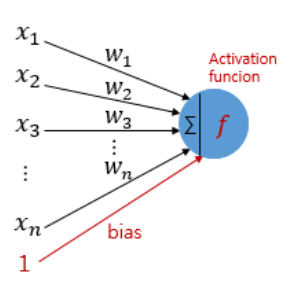

(1) 활성화 함수의 특징 - 비선형 함수 (Nonlinear function)

    * 활성화 함수의 특징은 비선형함수여야 한다는 것이다

    * 직선 1개로는 그릴 수 없는 함수의 형태를 띠어야 한다

    * 왜냐하면 활성화 함수가 선형 함수인 경우에는 은닉층을 쌓을 수가 없어지기 때문이다 

활성화 함수가 선형함수인 상태에서 층을 계속 쌓는다 가정해보자.

활성화 함수는 f(x) = wx라고 한다면 여기에 은닉층을 두 개 추가함을 식으로 나타낸다면, **y(x) = f(f(f(x)))**가 되게 된다.

---
이는 w * w * w * x로 표현이 가능하다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 계단함수

def step(X):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1) 
y = step(x)

plt.title('step function')
plt.plot(x,y)
plt.show()

In [ ]:
# 시그모이드

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5,5,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1,0], ':')
plt.show()

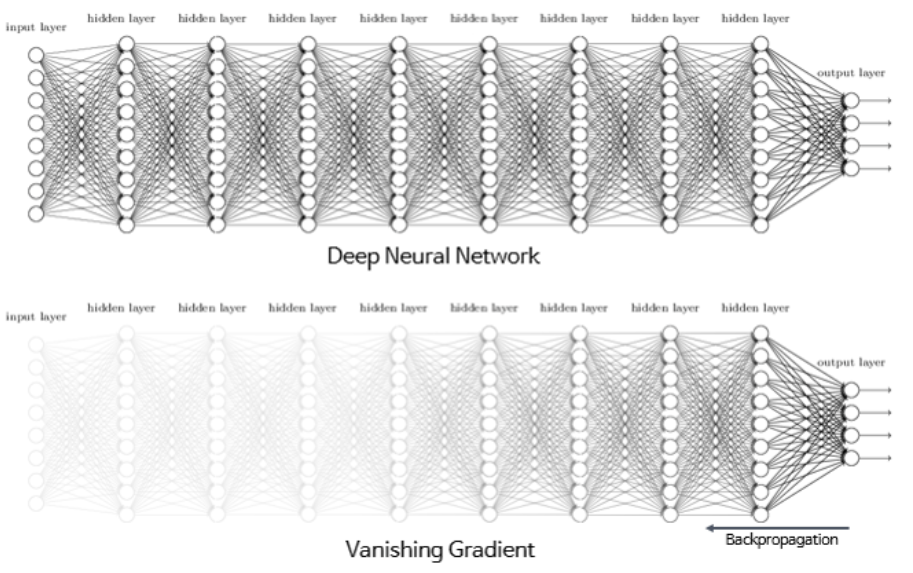

In [ ]:
# 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

x = np.arange(-5,5,0.1)
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,-1],':')
plt.axhline(y=0, color= 'orange', linestyle = '--' )
plt.title('Tanh Function')
plt.show()

# 단점 :: 하이퍼볼릭탄젠트 함수 또한 -1~1에 가까운 출력값을 출력시 시그모이드 함수와 같은 문제 발생
# 그러나 하이퍼볼릭탄젠트의 경우 시그모이드와는 달리 0을 중심으로 하고 있으며
# 하이퍼볼릭탄젠트를 미분했을때의 최대값은 1로써 sigmoid 최대값인 0.25보다 크게 됨
# 결론 :: sigmoid보단 기울기 vanishing이 적게 되며 그에 따른 hidden-layer에서 sigmoid보다 선호됨

In [ ]:
# 렐루 함수(ReLU)
# 인공신경망에서의 은닉층에서 가장 인기있는 함수
# f(x) = max(0,x)

def ReLU(x):
    return np.maximum(0, x)

x = np.arange(-5,5,0.1)
y = ReLU(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,-1],':')
plt.title('Relu Function')
plt.show()

# 렐루 함수는 음수를 입력하면 0을 출력하고,
# 양수를 입력하면 입력값을 그대로 반환
# 또한 특정 양수 값에 수렴하지 않는다는 장점
# 요약 :: 0이상의 입력값의 경우에는 미분값이 항상 1이다
# Depth가 큰 DNN의 경우에는 sigmoid보다 더 활용도가 높음
# 이에 더하여, 렐루 함수는 sigmoid 및 hyperbolic tanh 함수와 같이 연산이
# 필요한 것이 아니므로, 단순 임계치이므로 연산 속도도 빠름


# 단점:: 입력값이 음수면 기울기(weight)가 0, 즉 미분값이 0이 되는데 이 경우 뉴런 회생이 매우 어렵다
#        위와 같은 상황에 직면한 Neuron을 우리는 dying Relu라 한다

In [ ]:
# 리키 렐루 함수(Leaky ReLU)
# 죽은 렐루를 보완하기 위한 ReLu의 변형
# 다양한 변형 함수(function)가 존재함
# f(x) = max(ax,x) Leaky Relu의 경우 # a는 하이퍼파라미터로 Leaky('새는')정도를 결정
# input이 음수값일 경우에도 0이 아니라 0.001과 같은 매우 작은 수로 반환 

a = 0.1

def Leaky_Relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5,5,0.1)
y = Leaky_Relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0],':')
plt.title('Leaky Relu Function')
plt.show()


# 기울기가 0이 되지 않으면 Relu는 죽지 않는다

In [ ]:
# 소프트맥스 함수(Softmax Function)
# hidden layer에서 Relu계열 함수를 활용하는 것이 일반적

# 그러나, softmax는 sigmoid처럼 출력층에서 주로 활용됨
# sigmoid :: Binary Class vs softmax :: MultiClass


x = np.arange(-5,5,0.1)
y = np.exp(x)/np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()